In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
dataset=pd.read_csv("gld_price_data.csv")
dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [56]:
dataset=dataset.drop(columns=['Date'])

In [57]:
dataset

,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...
2285,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,2730.129883,124.489998,14.380000,15.5600,1.193118


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


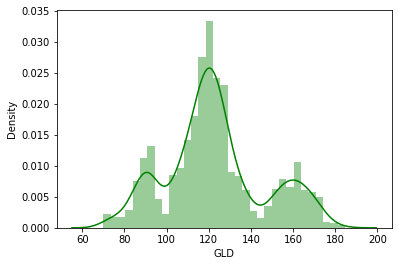

In [58]:
sns.distplot(dataset['GLD'],color='green')

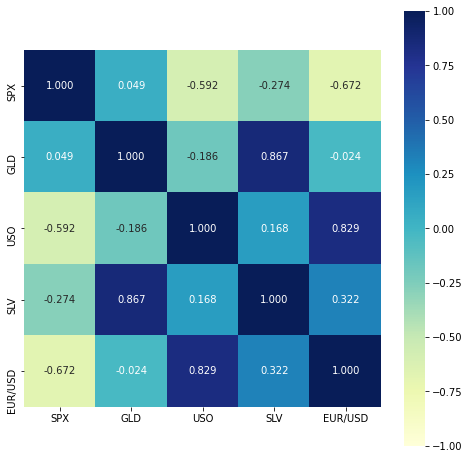

In [59]:
correlation=dataset.corr()
plt.figure(figsize=[8,8])
sns.heatmap(correlation,vmin=-1, vmax=1, cmap="YlGnBu",fmt='.3f',annot=True,  square=True)

In [60]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


In [61]:
y=dataset.iloc[:,1].values
dataset=dataset.drop(columns=['GLD'])
X=dataset.iloc[:,:].values

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=2)

In [63]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
regressor1=RandomForestRegressor(n_estimators=100)
regressor2=LinearRegression()
regressor1.fit(X_train, y_train)
regressor2.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
y_pred_train1=regressor1.predict(X_train)
y_pred_train2=regressor2.predict(X_train)

In [65]:
print("Accuracy Score1: ",r2_score(y_train, y_pred_train1))
print("Accuracy Score2: ",r2_score(y_train, y_pred_train2))

Accuracy Score1:  0.9984518060413504
Accuracy Score2:  0.8850695972446934


In [66]:
y_pred1=regressor1.predict(X_test)
y_pred2=regressor2.predict(X_test)

In [67]:
print("Accuracy Score1: ",r2_score(y_test, y_pred1))
print("Accuracy Score2: ",r2_score(y_test, y_pred2))

Accuracy Score1:  0.9895922992858582
Accuracy Score2:  0.8657886565869239
